In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
alpha = 0.95
N = 100

In [27]:
def show_intervals(sample, min_fun, max_fun, real_value, ylim):
    grid = numpy.arange(1, N + 1, 1)
    minimums = numpy.zeros(N)
    maximums = numpy.zeros(N)

    for n in range(1, N + 1):
        minimums[n - 1] = min_fun(sample[:n])
        maximums[n - 1] = max_fun(sample[:n])

    plt.figure(figsize=(16, 6))
    plt.fill_between(grid, minimums, maximums)
    plt.plot(grid, numpy.ones(N) * real_value, color="red")
    plt.ylim(ylim[0], ylim[1])
    plt.show()
    
def check_interval(distr, real_value, min_fun, max_fun, sizes):
    sample_size = 10000
    probability = []
    for n in sizes:
        hit = 0
        for j in range(sample_size):
            sample = distr(n)
            if min_fun(sample) < real_value < max_fun(sample):
                hit += 1
        probability.append(hit / sample_size)
    return probability     

Доверительный интервал уровня $\alpha$ для $U(0, \theta)$ - это $(\frac{2 \overline X}{1 + \sqrt{3n(1-\alpha)}}, \frac{2 \overline X}{1 - \sqrt{3n(1-\alpha)}})$

In [81]:
min_fun = lambda x: 2 * numpy.mean(x) / (1 + (3 * len(x) * (1 - alpha)) ** -0.5)
max_fun = lambda x: 2 * numpy.mean(x) / (1 - (3 * len(x) * (1 - alpha)) ** -0.5)

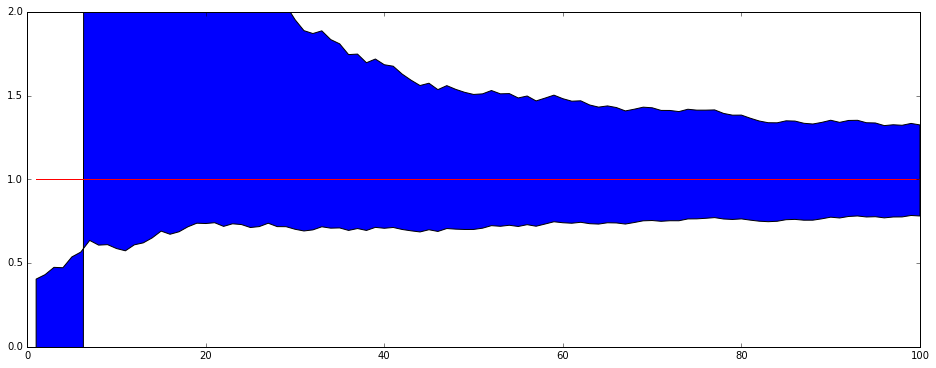

In [83]:
check_interval((lambda n: numpy.random.uniform(0, 1, n)), 
               1, min_fun, max_fun, [10, 100])

show_intervals(numpy.random.uniform(0, 1, N), min_fun, max_fun, 1,(0, 2))

Доверительный интервал уровня $\alpha$ для $U(0, \theta)$ - это $(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$

In [79]:
min_fun = lambda x: numpy.max(x)
max_fun = lambda x: numpy.max(x) / ((1 - alpha) ** (1 / len(x)))

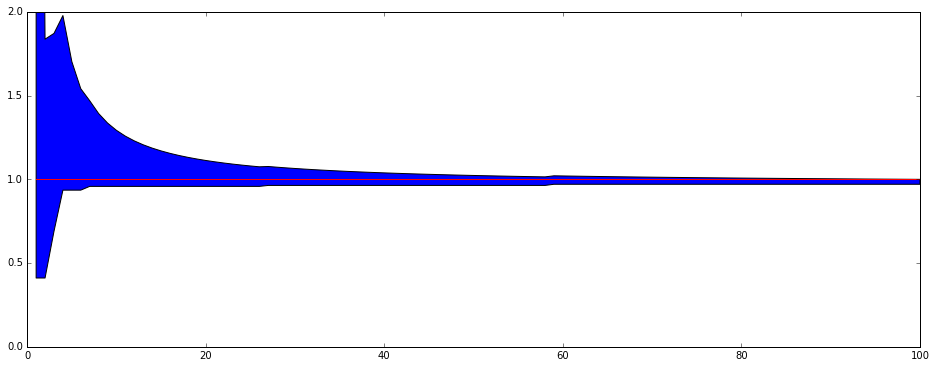

In [80]:
check_interval((lambda n: numpy.random.uniform(0, 1, n)), 
               1, min_fun, max_fun, [10, 100])

show_intervals(numpy.random.uniform(0, 1, N), min_fun, max_fun, 1, (0, 2))

Асимптотический доверительный интервал уровня $\alpha$ для $Cauchy(\theta, 1)$ - это $(\mu - \frac{\pi z} {2 \sqrt{n}}, \mu + \frac{\pi z} {2 \sqrt{n}})$, где $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

In [67]:
z = stats.norm.ppf(0.5 + alpha / 2)
min_fun = lambda x: numpy.median(x) - numpy.pi * z / (2 * (len(x) ** 0.5))
max_fun = lambda x: numpy.median(x) + numpy.pi * z / (2 * (len(x) ** 0.5))

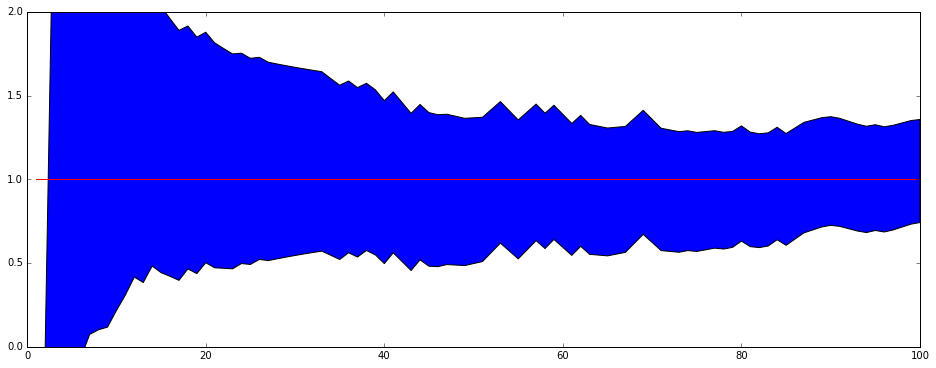

In [68]:
check_interval((lambda n: numpy.random.standard_cauchy(n) + 1),
               1, min_fun, max_fun, [10, 100])

show_intervals(numpy.random.standard_cauchy(N) + 1, min_fun, max_fun, 1, (0, 2))

Асимптотический доверительный интервал уровня $\alpha$ для $Pois(\theta)$ - это $(\overline X - z \frac{\overline X}{\sqrt{n}}, \overline X + z \frac{\overline X}{\sqrt{n}})$, где $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

In [69]:
z = stats.norm.ppf(0.5 + alpha / 2)
min_fun = lambda x: numpy.mean(x) - z * (numpy.mean(x) / len(x)) ** 0.5
max_fun = lambda x: numpy.mean(x) + z * (numpy.mean(x) / len(x)) ** 0.5

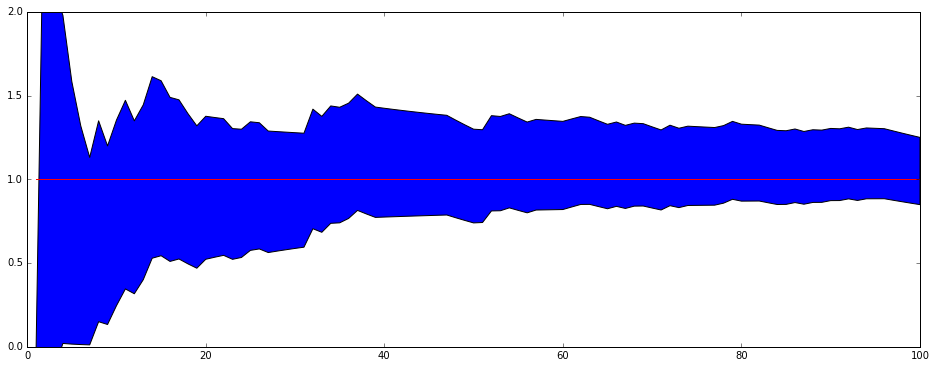

In [70]:
check_interval(lambda n: numpy.random.poisson(1, n),
               1, min_fun, max_fun, [10, 100])

show_intervals(numpy.random.poisson(1, N), min_fun, max_fun, 1, (0, 2))

Асимптотический доверительный интервал уровня $\alpha$ для $Г(\theta, \lambda)$ - это $(\frac{\lambda - z \sqrt{\frac{\lambda}{n}}}{\overline X}, \frac{\lambda + z \sqrt{\frac{\lambda}{n}}}{\overline X})$, где $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

In [74]:
z = stats.norm.ppf(0.5 + alpha / 2)
min_fun = lambda x: (1 - z * (1 / len(x)) ** 0.5) / numpy.mean(x)
max_fun = lambda x: (1 + z * (1 / len(x)) ** 0.5) / numpy.mean(x)

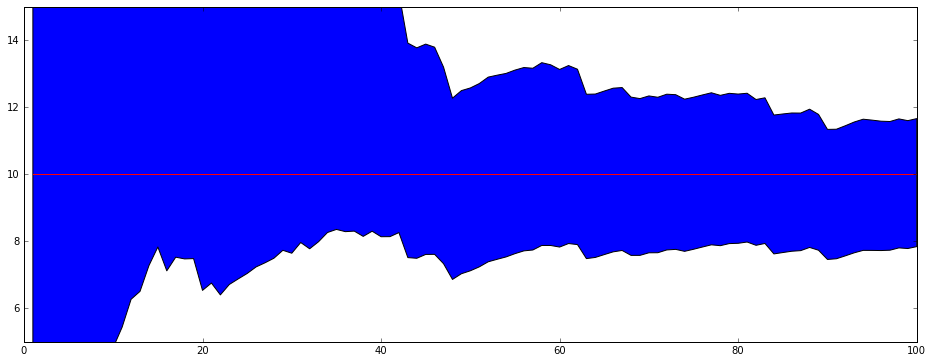

In [78]:
check_interval(lambda n: numpy.random.gamma(1, 0.1, n),
               10, min_fun, max_fun, [10, 100])

show_intervals(numpy.random.gamma(1, 0.1, N), min_fun, max_fun, 10, (5, 15))